In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None



In [2]:
df = pd.read_csv("movies.csv")

In [3]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [5]:
df['budget'] = pd.to_numeric(df['budget'], errors='coerce').fillna(0).astype(int)
df['gross'] = pd.to_numeric(df['gross'], errors='coerce').fillna(0).astype(int) 

In [6]:
df.isna().sum()

name         0
rating      77
genre        0
year         0
released     2
score        3
votes        3
director     0
writer       3
star         1
country      3
budget       0
gross        0
company     17
runtime      4
dtype: int64

In [7]:
 df['yearcorrect'] = df['released'].astype(str).str.split().str[2]

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         7668 non-null   object 
 1   rating       7591 non-null   object 
 2   genre        7668 non-null   object 
 3   year         7668 non-null   int64  
 4   released     7666 non-null   object 
 5   score        7665 non-null   float64
 6   votes        7665 non-null   float64
 7   director     7668 non-null   object 
 8   writer       7665 non-null   object 
 9   star         7667 non-null   object 
 10  country      7665 non-null   object 
 11  budget       7668 non-null   int32  
 12  gross        7668 non-null   int32  
 13  company      7651 non-null   object 
 14  runtime      7664 non-null   float64
 15  yearcorrect  7662 non-null   object 
dtypes: float64(3), int32(2), int64(1), object(10)
memory usage: 898.7+ KB


In [9]:
df.dropna(inplace = True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7570 entries, 0 to 7659
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         7570 non-null   object 
 1   rating       7570 non-null   object 
 2   genre        7570 non-null   object 
 3   year         7570 non-null   int64  
 4   released     7570 non-null   object 
 5   score        7570 non-null   float64
 6   votes        7570 non-null   float64
 7   director     7570 non-null   object 
 8   writer       7570 non-null   object 
 9   star         7570 non-null   object 
 10  country      7570 non-null   object 
 11  budget       7570 non-null   int32  
 12  gross        7570 non-null   int32  
 13  company      7570 non-null   object 
 14  runtime      7570 non-null   float64
 15  yearcorrect  7570 non-null   object 
dtypes: float64(3), int32(2), int64(1), object(10)
memory usage: 946.2+ KB


In [11]:
df.sample(10)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
2375,The Meteor Man,PG,Action,1993,"August 6, 1993 (United States)",5.2,7800.0,Robert Townsend,Robert Townsend,Robert Townsend,United States,20000000,8016708,Metro-Goldwyn-Mayer (MGM),100.0,1993
4216,Demonlover,R,Drama,2002,"November 6, 2002 (France)",5.9,5100.0,Olivier Assayas,Olivier Assayas,Connie Nielsen,France,0,462976,Citizen Films,129.0,2002
4379,Ned Kelly,R,Action,2003,"March 26, 2004 (United States)",6.5,26000.0,Gregor Jordan,Robert Drewe,Heath Ledger,Australia,0,6585516,Australian Film Finance Corporation (AFFC),110.0,2004
5111,The Bucket List,PG-13,Adventure,2007,"January 11, 2008 (United States)",7.4,235000.0,Rob Reiner,Justin Zackham,Jack Nicholson,United States,45000000,175372502,Warner Bros.,97.0,2008
2683,Pocahontas,G,Animation,1995,"June 23, 1995 (United States)",6.7,175000.0,Mike Gabriel,Carl Binder,Mel Gibson,United States,55000000,346079773,Walt Disney Pictures,81.0,1995
5367,Mirrors,R,Horror,2008,"August 15, 2008 (United States)",6.1,104000.0,Alexandre Aja,Alexandre Aja,Kiefer Sutherland,United States,35000000,78094714,New Regency Productions,110.0,2008
7366,American Animals,R,Biography,2018,"August 14, 2018 (United States)",7.0,41000.0,Bart Layton,Bart Layton,Spencer Reinhard,United Kingdom,0,4080073,Film4,116.0,2018
4775,BloodRayne,R,Action,2005,"January 6, 2006 (United States)",2.9,34000.0,Uwe Boll,Guinevere Turner,Kristanna Loken,Germany,25000000,3650275,Boll Kino Beteiligungs GmbH & Co. KG,95.0,2006
3938,Pulse,R,Horror,2001,"November 9, 2005 (United States)",6.6,18000.0,Kiyoshi Kurosawa,Kiyoshi Kurosawa,Haruhiko Katô,Japan,0,318451,Daiei Eiga,119.0,2005
4468,The Butterfly Effect,R,Drama,2004,"January 23, 2004 (United States)",7.6,460000.0,Eric Bress,J. Mackye Gruber,Ashton Kutcher,United States,13000000,96822421,BenderSpink,113.0,2004


In [12]:
df.sort_values(by = ['gross'], inplace = True, ascending = False)

In [13]:
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018
7480,The Lion King,PG,Animation,2019,"July 19, 2019 (United States)",6.9,222000.0,Jon Favreau,Jeff Nathanson,Donald Glover,United States,260000000,1670727580,Walt Disney Pictures,118.0,2019
6653,Jurassic World,PG-13,Action,2015,"June 12, 2015 (United States)",7.0,593000.0,Colin Trevorrow,Rick Jaffa,Chris Pratt,United States,150000000,1670516444,Universal Pictures,124.0,2015
6043,The Avengers,PG-13,Action,2012,"May 4, 2012 (United States)",8.0,1300000.0,Joss Whedon,Joss Whedon,Robert Downey Jr.,United States,220000000,1518815515,Marvel Studios,143.0,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1338,Time of the Gypsies,R,Comedy,1988,"February 9, 1990 (United States)",8.2,29000.0,Emir Kusturica,Emir Kusturica,Davor Dujmovic,Yugoslavia,0,0,Forum Sarajevo,142.0,1990
3835,Kaho Naa... Pyaar Hai,Not Rated,Action,2000,"January 14, 2000 (India)",6.9,14000.0,Rakesh Roshan,Rakesh Roshan,Hrithik Roshan,India,0,0,Film Kraft,172.0,2000
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,-2147483648,Marvel Studios,181.0,2019
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,-2147483648,Twentieth Century Fox,162.0,2009


In [15]:
df.drop_duplicates()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018
7480,The Lion King,PG,Animation,2019,"July 19, 2019 (United States)",6.9,222000.0,Jon Favreau,Jeff Nathanson,Donald Glover,United States,260000000,1670727580,Walt Disney Pictures,118.0,2019
6653,Jurassic World,PG-13,Action,2015,"June 12, 2015 (United States)",7.0,593000.0,Colin Trevorrow,Rick Jaffa,Chris Pratt,United States,150000000,1670516444,Universal Pictures,124.0,2015
6043,The Avengers,PG-13,Action,2012,"May 4, 2012 (United States)",8.0,1300000.0,Joss Whedon,Joss Whedon,Robert Downey Jr.,United States,220000000,1518815515,Marvel Studios,143.0,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1338,Time of the Gypsies,R,Comedy,1988,"February 9, 1990 (United States)",8.2,29000.0,Emir Kusturica,Emir Kusturica,Davor Dujmovic,Yugoslavia,0,0,Forum Sarajevo,142.0,1990
3835,Kaho Naa... Pyaar Hai,Not Rated,Action,2000,"January 14, 2000 (India)",6.9,14000.0,Rakesh Roshan,Rakesh Roshan,Hrithik Roshan,India,0,0,Film Kraft,172.0,2000
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,-2147483648,Marvel Studios,181.0,2019
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,-2147483648,Twentieth Century Fox,162.0,2009


In [16]:
df.corr()

,year,score,votes,budget,gross,runtime
year,1.000000,0.102859,0.226686,0.314683,0.258885,0.120743
score,0.102859,1.000000,0.412371,0.057153,0.171424,0.400937
votes,0.226686,0.412371,1.000000,0.485225,0.573817,0.309372
budget,0.314683,0.057153,0.485225,1.000000,0.687256,0.270024
gross,0.258885,0.171424,0.573817,0.687256,1.000000,0.203550
runtime,0.120743,0.400937,0.309372,0.270024,0.203550,1.000000


Text(0.5, 1.0, 'Budget vs Gross Plot')

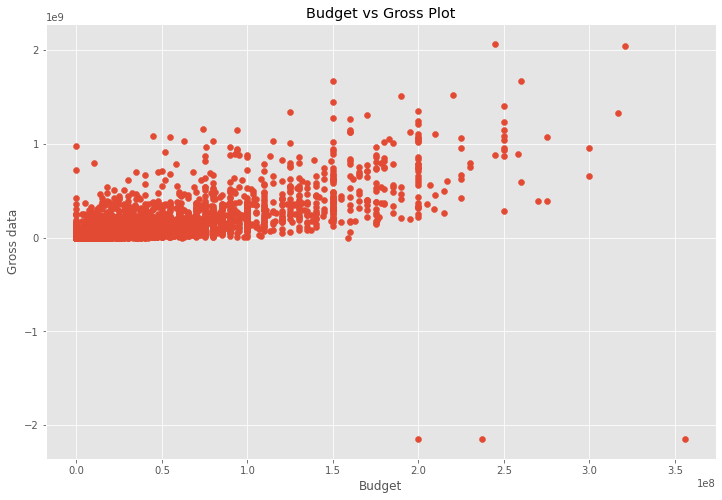

In [19]:
plt.scatter(x='budget',y='gross',data=df)
plt.xlabel("Budget")
plt.ylabel("Gross data")
plt.title("Budget vs Gross Plot")

<AxesSubplot:xlabel='budget', ylabel='gross'>

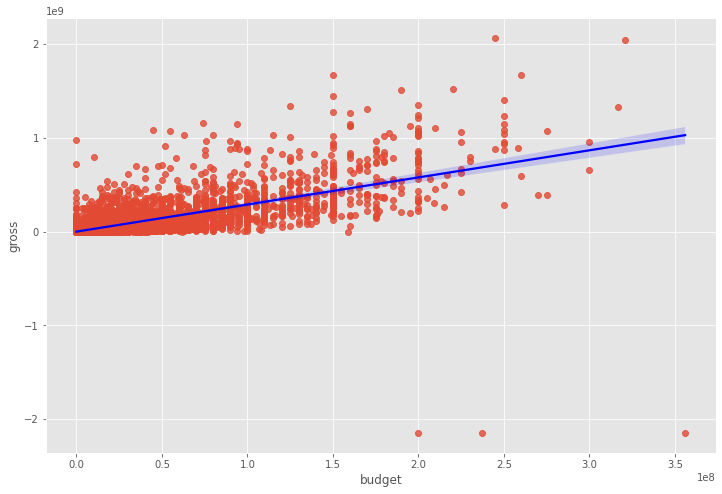

In [21]:
sns.regplot(x='budget',y='gross',data=df,line_kws={"color":"blue"})

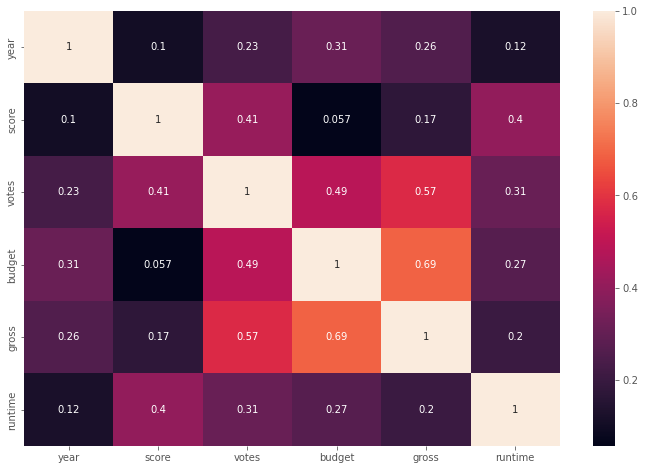

In [23]:
corr_matrix=df.corr()
sns.heatmap(corr_matrix,annot=True)
plt.show()

In [27]:
df_numerized=df
for col in df_numerized.columns:
    if(df_numerized[col].dtype=='object'):
        df_numerized[col] = df_numerized[col].astype('category') 
        df_numerized[col] = df_numerized[col].cat.codes
df_numerized

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
6663,5074,5,0,2015,686,7.8,876000.0,1105,2517,505,55,245000000,2069521700,1502,138.0,37
7244,530,5,0,2018,185,8.4,897000.0,160,729,2189,55,321000000,2048359754,1568,149.0,40
7480,6111,4,2,2019,1464,6.9,222000.0,1430,1894,654,55,260000000,1670727580,2266,118.0,41
6653,2938,5,0,2015,1680,7.0,593000.0,507,3521,421,55,150000000,1670516444,2232,124.0,37
6043,5424,5,0,2012,2440,8.0,1300000.0,1491,2285,2189,55,220000000,1518815515,1568,143.0,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1338,6797,6,4,1988,1097,8.2,29000.0,789,1251,593,58,0,0,1073,142.0,12
3835,2965,3,0,2000,1150,6.9,14000.0,2220,3424,979,20,0,0,1011,172.0,22
7445,529,5,0,2019,176,8.4,903000.0,160,729,2189,55,356000000,-2147483648,1568,181.0,41
5445,527,5,0,2009,684,7.8,1100000.0,1134,1755,2280,55,237000000,-2147483648,2204,162.0,31


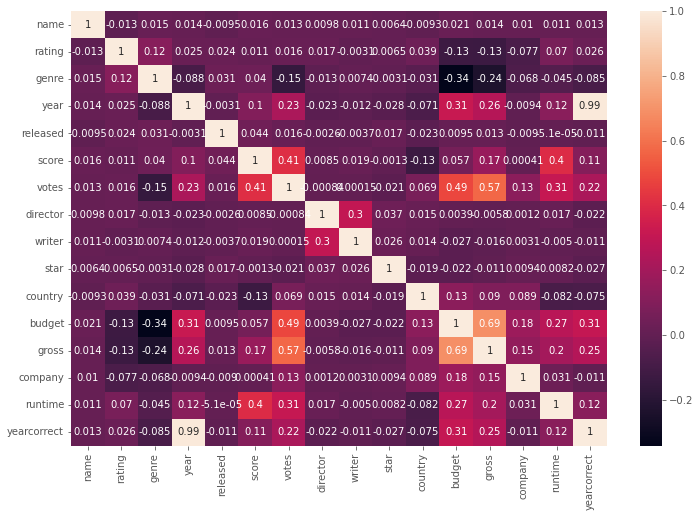

In [28]:
corre_matrix=df_numerized.corr()
sns.heatmap(corr_matrix,annot=True)
plt.show()

In [29]:
corre_matrix=df_numerized.corr()
corr_pairs = corre_matrix.unstack()
corr_pairs

name         name           1.000000
             rating        -0.012550
             genre          0.015062
             year           0.013641
             released      -0.009465
                              ...   
yearcorrect  budget         0.305960
             gross          0.252008
             company       -0.010984
             runtime        0.120952
             yearcorrect    1.000000
Length: 256, dtype: float64

In [30]:
sorted_pairs=corr_pairs.sort_values()
sorted_pairs

budget       genre         -0.341894
genre        budget        -0.341894
gross        genre         -0.235922
genre        gross         -0.235922
             votes         -0.148207
                              ...   
year         year           1.000000
genre        genre          1.000000
rating       rating         1.000000
runtime      runtime        1.000000
yearcorrect  yearcorrect    1.000000
Length: 256, dtype: float64

In [33]:
high_corr = sorted_pairs[(sorted_pairs)>0.5]
high_corr

gross        votes          0.573817
votes        gross          0.573817
budget       gross          0.687256
gross        budget         0.687256
year         yearcorrect    0.991923
yearcorrect  year           0.991923
name         name           1.000000
company      company        1.000000
gross        gross          1.000000
budget       budget         1.000000
country      country        1.000000
star         star           1.000000
writer       writer         1.000000
director     director       1.000000
votes        votes          1.000000
score        score          1.000000
released     released       1.000000
year         year           1.000000
genre        genre          1.000000
rating       rating         1.000000
runtime      runtime        1.000000
yearcorrect  yearcorrect    1.000000
dtype: float64